In [10]:
import pandas as pd

# First Year

In [14]:
bsc1 = pd.read_excel('../DataSet/BSc1DADataSetFinal.xlsx', header=[1, 2])

bsc1

Student_Details                                           \
              RollNo   EnrolNo Part1Total GrandTotal   Result   
0            2202001  U2112626        214        214  Elig/SE   
1            2202002  U2112395        132        132   Failed   
2            2202003  U2112367        200        200   Passed   
3            2202004  U2112016         AA         AA   Absent   
4            2202005  U2112649         AA         AA   Absent   
...              ...       ...        ...        ...      ...   
3312         2206715  I2110715        100        100   Failed   
3313         2206716  I2110716        115        115   Failed   
3314         2206717  I2110717        249        249   Passed   
3315         2206718  I2110719         AA         AA   Absent   
3316         2206719  I2110718        241        241   Passed   

                                              Physics                 \
     Mechanics and Special Theory of Relativity S.T.R Thermal Phyics   
0                                                  18             18   
1                                                  12              6   
2                                                  15             11   
3                                                  AA             AA   
4                                                  AA             AA   
...                                               ...            ...   
3312                                                0              0   
3313                                                0              0   
3314                                               14             14   
3315                                               AA             AA   
3316                                               21              7   

                            Mathematics  ...  \
     Electronics Practicals   Geometry   ...   
0             20         25          AA  ...   
1              8         28           5  ...   
2             14         35          19  ...   
3             AA         AA          AA  ...   
4             AA         AA          AA  ...   
...          ...        ...         ...  ...   
3312           9         22           0  ...   
3313           4         24           2  ...   
3314          20         31          20  ...   
3315          AA         AA          AA  ...   
3316          15         36          26  ...   

                                         Zoology                           \
     PLATYHELMINTHES, ASCHELMINTHES AND ANNELIDA ARTHROPODA, HEMICHORDATA   
0                                             --                       --   
1                                             --                       --   
2                                             --                       --   
3                                             --                       --   
4                                             --                       --   
...                                          ...                      ...   
3312                                          --                       --   
3313                                          --                       --   
3314                                          --                       --   
3315                                          --                       --   
3316                                          --                       --   

                         Geography                                    Geology  \
     Practicals Physical Geography Human Geography Practicals General Geology   
0            --                 --              --         --              --   
1            --                 --              --         --              --   
2            --                 --              --         --              --   
3            --                 --              --         --              --   
4            --                 --              --         --              --   
...         ...             

In [15]:
        
import pandas as pd
import datetime

# Load your dataset
bsc1 = pd.read_excel('../DataSet/BSc1DADataSetFinal.xlsx', header=[1, 2])
pass_stud_count = {}
fail_stud_count = {}
elig_stud_count = {}
total_pass = 0
total_stud=0

# Iterate through each student
for index, row in bsc1.iterrows():
    present_subjects = set()
    total_marks = 0
    count=0
    result_type=''
    flag = False

    for subject, subheading in bsc1.columns:
        value = row[(subject, subheading)]
        if subject == "Student_Details" and subheading == "EnrolNo" and str(value).startswith('U')==True:
            flag = True
            break

    for subject, subheading in bsc1.columns:
        value = row[(subject, subheading)]

        if subject != "Student_Details" and flag==True and pd.notna(value) and str(value).strip() not in ['0', '--','UFM', 'AA']:
            present_subjects.add(subject)

            # Try converting value to float and add to total
            try:
                if not isinstance(value, (datetime.date, datetime.datetime)):
                    total_marks += float(value)
                    

            except ValueError:
                pass  # Ignore if conversion to number fails
        
        if subject == 'Student_Details' and subheading == 'Result':
            result_type = row[(subject, subheading)]



        
    if len(present_subjects) == 3:
        total_stud+=1
        key = tuple(sorted(present_subjects))

        # Initialize if not exists
        if key not in pass_stud_count:
            pass_stud_count[key] = 0
        if key not in fail_stud_count:
            fail_stud_count[key] = 0
        if key not in elig_stud_count:
            elig_stud_count[key] = 0

        # sum_of_subs[key] += total_marks
        if result_type=="Failed":
            fail_stud_count[key] += 1
            
        if result_type=="Passed":
            
            pass_stud_count[key] += 1
        if result_type=="Elig/SE":
            total_pass += 1
            elig_stud_count[key] += 1


# print("\n\n")
for key,value in pass_stud_count.items():
    print(f"{key}:{value}")
print("\n\n")
for key,value in fail_stud_count.items():
    print(f"{key}:{value}")
print("\n\n")
for key,value in elig_stud_count.items():
    print(f"{key}:{value}")

print(total_pass)
print(total_stud)

('Mathematics', 'Physics', 'Statistics'):24
('Chemistry', 'Mathematics', 'Physics'):180
('Geography', 'Mathematics', 'Physics'):19
('Botany', 'Chemistry', 'Zoology'):144
('Computer Science', 'Mathematics', 'Physics'):35
('Defence Studies', 'Mathematics', 'Physics'):23
('Computer Science', 'Mathematics', 'Psychology'):16
('Geology', 'Mathematics', 'Physics'):16
('Anthropology', 'Botany', 'Zoology'):11
('Biochemistry', 'Chemistry', 'Zoology'):13
('Botany', 'Defence Studies', 'Zoology'):16
('Biochemistry', 'Botany', 'Chemistry'):5



('Mathematics', 'Physics', 'Statistics'):5
('Chemistry', 'Mathematics', 'Physics'):58
('Geography', 'Mathematics', 'Physics'):2
('Botany', 'Chemistry', 'Zoology'):26
('Computer Science', 'Mathematics', 'Physics'):6
('Defence Studies', 'Mathematics', 'Physics'):3
('Computer Science', 'Mathematics', 'Psychology'):4
('Geology', 'Mathematics', 'Physics'):4
('Anthropology', 'Botany', 'Zoology'):0
('Biochemistry', 'Chemistry', 'Zoology'):3
('Botany', 'Defence Studi

In [ ]:
import pandas as pd

# Prepare list of rows for the final Excel output
final_data = []

# Get all unique keys from all dictionaries
all_keys = set(pass_stud_count.keys()) | set(fail_stud_count.keys()) | set(elig_stud_count.keys())

for key in all_keys:
    subjects = list(key) + [""] * (3 - len(key))  # pad to 3 subjects if needed
    final_data.append({
        "Subject 1": subjects[0],
        "Subject 2": subjects[1],
        "Subject 3": subjects[2],
        "Count_of_Pass": pass_stud_count.get(key, 0),
        "Count_of_Fail": fail_stud_count.get(key, 0),
        "Count_of_Elig": elig_stud_count.get(key, 0),
    })

# Create DataFrame
result_df = pd.DataFrame(final_data)

# Save to Excel
result_df.to_excel("University_Student_Result_Analysis.xlsx", index=False)

print("Excel file 'University_Student_Result_Analysis.xlsx' created successfully.")

Excel file 'University_Student_Result_Analysis.xlsx' created successfully.


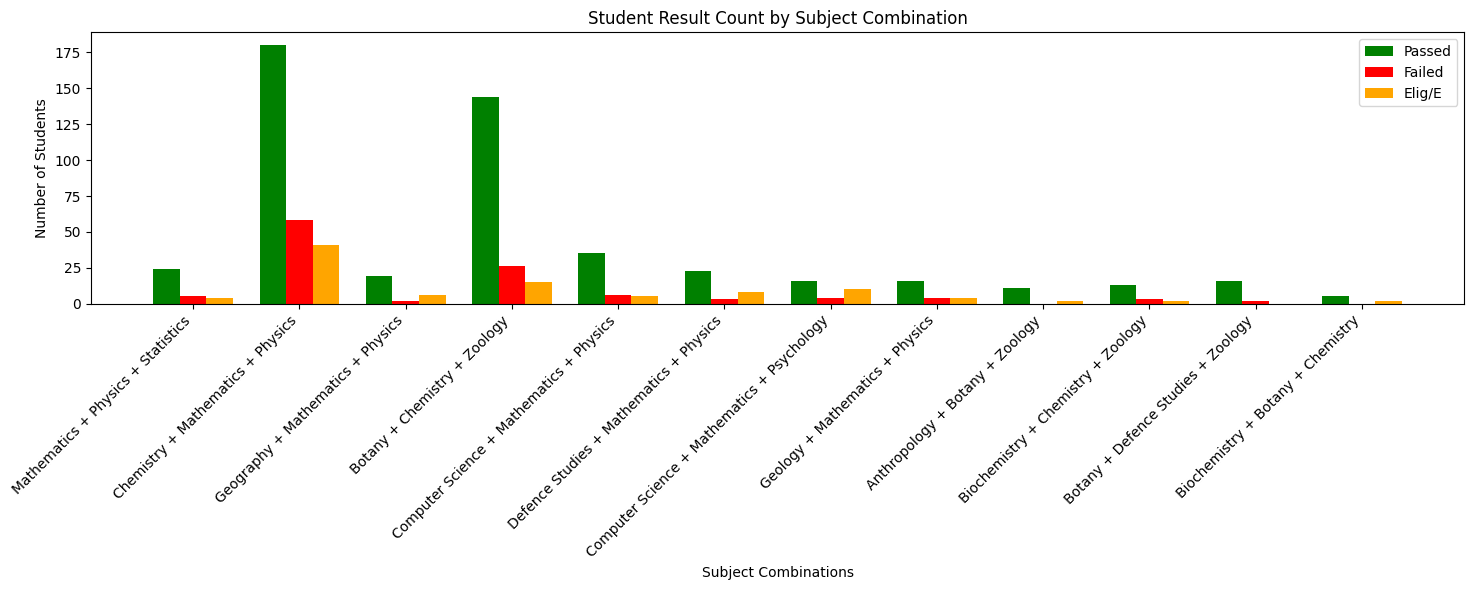

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Set up combinations
combinations = list(pass_stud_count.keys())
labels = [' + '.join(comb) for comb in combinations]

pass_vals = [pass_stud_count.get(key, 0) for key in combinations]
fail_vals = [fail_stud_count.get(key, 0) for key in combinations]
elig_vals = [elig_stud_count.get(key, 0) for key in combinations]

x = np.arange(len(combinations))  # label locations
width = 0.25

plt.figure(figsize=(15, 6))
plt.bar(x - width, pass_vals, width, label='Passed', color='green')
plt.bar(x, fail_vals, width, label='Failed', color='red')
plt.bar(x + width, elig_vals, width, label='Elig/E', color='orange')

plt.xlabel('Subject Combinations')
plt.ylabel('Number of Students')
plt.title('Student Result Count by Subject Combination')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

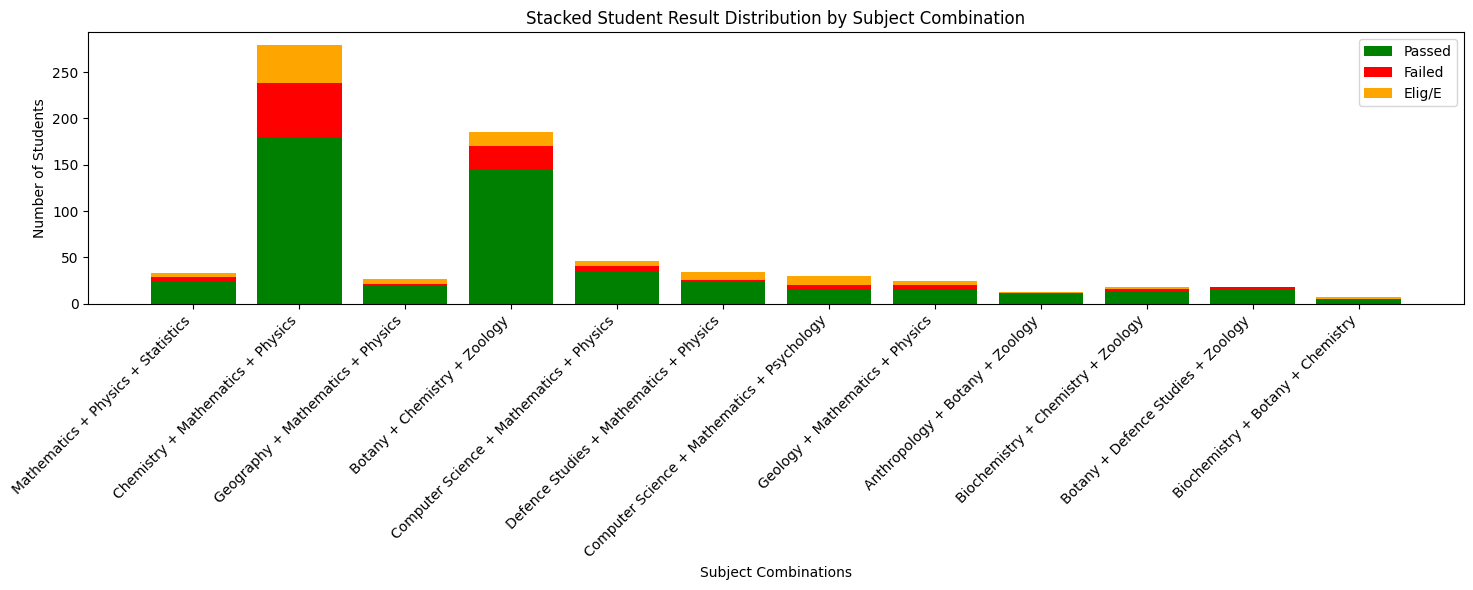

In [17]:
plt.figure(figsize=(15, 6))
plt.bar(labels, pass_vals, label='Passed', color='green')
plt.bar(labels, fail_vals, bottom=pass_vals, label='Failed', color='red')
bottom_vals = [p + f for p, f in zip(pass_vals, fail_vals)]
plt.bar(labels, elig_vals, bottom=bottom_vals, label='Elig/E', color='orange')

plt.xlabel('Subject Combinations')
plt.ylabel('Number of Students')
plt.title('Stacked Student Result Distribution by Subject Combination')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

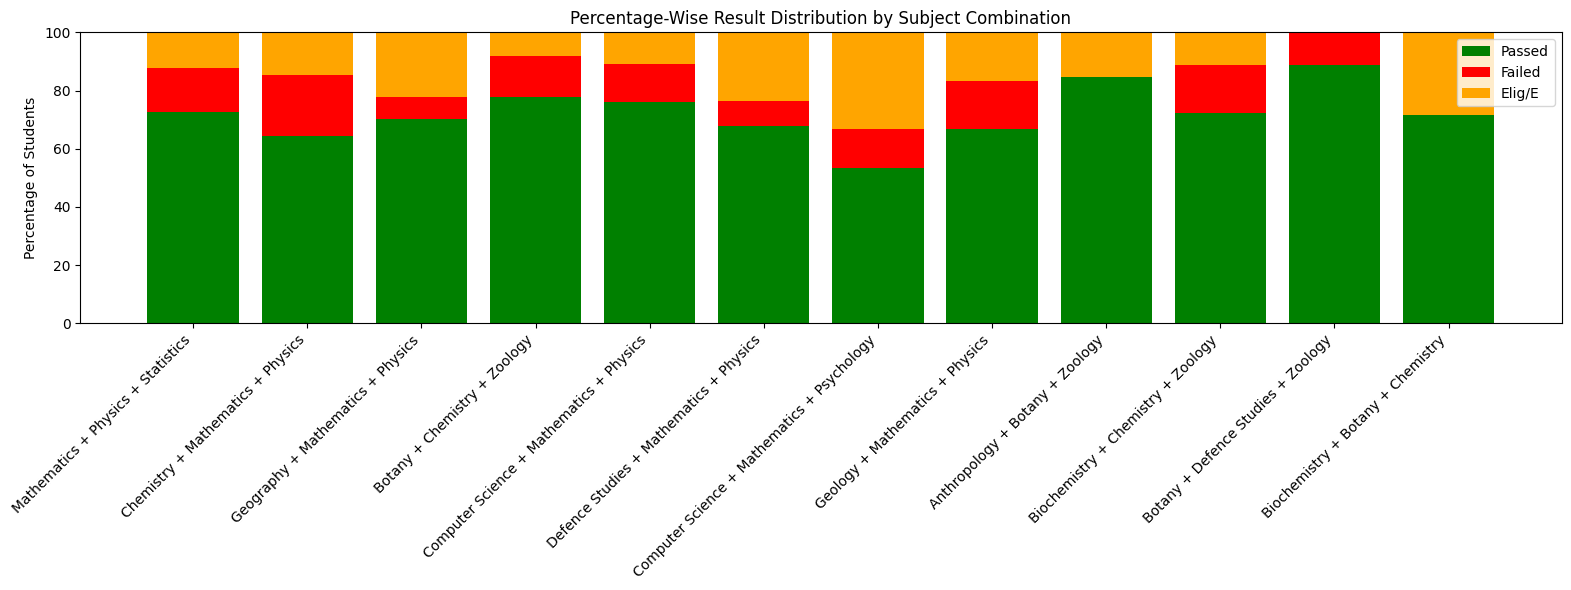

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Subject combinations
combinations = list(pass_stud_count.keys())
labels = [' + '.join(comb) for comb in combinations]

# Get raw counts
pass_vals = np.array([pass_stud_count.get(key, 0) for key in combinations])
fail_vals = np.array([fail_stud_count.get(key, 0) for key in combinations])
elig_vals = np.array([elig_stud_count.get(key, 0) for key in combinations])

# Total students in each combination
total_vals = pass_vals + fail_vals + elig_vals

# Avoid division by zero
total_vals[total_vals == 0] = 1

# Calculate percentages
pass_pct = (pass_vals / total_vals) * 100
fail_pct = (fail_vals / total_vals) * 100
elig_pct = (elig_vals / total_vals) * 100

# Plot
x = np.arange(len(combinations))
plt.figure(figsize=(16, 6))
plt.bar(x, pass_pct, label='Passed', color='green')
plt.bar(x, fail_pct, bottom=pass_pct, label='Failed', color='red')
plt.bar(x, elig_pct, bottom=pass_pct + fail_pct, label='Elig/E', color='orange')

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Percentage of Students')
plt.title('Percentage-Wise Result Distribution by Subject Combination')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

# Second Year

In [ ]:
bsc2 = pd.read_excel('../DataSet/BSC2DADatasetFinal.xlsx',header=[1,2])  # Assuming your file has multi-level headers
bsc2

Student_Details                                                     \
              RollNo   EnrolNo Part1Total Part2Total GrandTotal  Result   
0            2307001  U2112626       247*        263        510  Passed   
1            2307002  U2112367        200        212        412  Passed   
2            2307003  U2112440       216*        244        460  Passed   
3            2307004  U2110207       204*        217        421  Passed   
4            2307005  U2112447       210*        153        363  Failed   
...              ...       ...        ...        ...        ...     ...   
1584         2311315  I2110654       232*        215        447  Failed   
1585         2311316  I2110658       231*        205        436  Passed   
1586         2311317  I2110710       228*        180        408  Failed   
1587         2311318  I2110114       224*        196        420  Elig/E   
1588         2311320  I2110144        189        173        362  Elig/E   

     Physics                                          \
      Optics Oscillation, Waves and Electromagnetism   
0         20                                      22   
1         17                                      19   
2         19                                      16   
3         --                                      --   
4          5                                       9   
...      ...                                     ...   
1584       7                                       8   
1585       7                                      12   
1586       3                                       4   
1587      22                                      15   
1588       5                                       4   

                                            ...    Zoology  \
     Atomic and Nuclear Physics Practicals  ... VERTEBRATA   
0                            14         30  ...         --   
1                            11         20  ...         --   
2                            19         22  ...         --   
3                            --         --  ...         16   
4                            12         15  ...         --   
...                         ...        ...  ...        ...   
1584                         16         32  ...         --   
1585                         16         31  ...         --   
1586                          2         33  ...         --   
1587                         16         AA  ...         --   
1588                          5         30  ...         --   

                                                            Geography  \
     GENETICS AND CELL BIOLOGY Practicals Regional Geography of World   
0                           --         --                          --   
1                           --         --                          --   
2                           --         --                          31   
3                           11         30                          --   
4                           --         --                          --   
...                        ...        ...                         ...   
1584                        --         --                          --   
1585                        --         --                          --   
1586                        --         --                          --   
1587                        --         --                          --   
1588                        --         --                          --   

                                        Geology                         \
     Geography of India PRACTICALS Paleontology Stratigraphy Petrology   
0                    --         --           --           --        --   
1                    --         --           --           --        --   
2                    29         37           --           --        --   
3                    --         --           --           --        --   
4                    --         --           --           --        --   
...                 ...  

In [ ]:
        
import pandas as pd
import datetime

# Load your dataset
bsc2 = pd.read_excel('../DataSet/BSC2DADataSetFinal.xlsx', header=[1, 2])
pass_stud_count = {}
fail_stud_count = {}
elig_stud_count = {}
total_pass = 0
total_stud=0

# Iterate through each student
for index, row in bsc2.iterrows():
    present_subjects = set()
    total_marks = 0
    count=0
    result_type=''
    flag = False

    for subject, subheading in bsc2.columns:
        value = row[(subject, subheading)]
        if subject == "Student_Details" and subheading == "EnrolNo" and str(value).startswith('U')==True:
            flag = True
            break

    for subject, subheading in bsc2.columns:
        value = row[(subject, subheading)]

        if subject != "Student_Details" and flag==True and pd.notna(value) and str(value).strip() not in ['0', '--','UFM', 'AA']:
            present_subjects.add(subject)

            # Try converting value to float and add to total
            try:
                if not isinstance(value, (datetime.date, datetime.datetime)):
                    total_marks += float(value)
                    

            except ValueError:
                pass  # Ignore if conversion to number fails
        
        if subject == 'Student_Details' and subheading == 'Result':
            result_type = row[(subject, subheading)]



        
    if len(present_subjects) == 3:
        total_stud+=1
        key = tuple(sorted(present_subjects))

        # Initialize if not exists
        if key not in pass_stud_count:
            pass_stud_count[key] = 0
        if key not in fail_stud_count:
            fail_stud_count[key] = 0
        if key not in elig_stud_count:
            elig_stud_count[key] = 0

        # sum_of_subs[key] += total_marks
        if result_type=="Failed":
            fail_stud_count[key] += 1
            total_pass += 1
        if result_type=="Passed":
            
            pass_stud_count[key] += 1
        if result_type=="Elig/E":
            
            elig_stud_count[key] += 1


# print("\n\n")
for key,value in pass_stud_count.items():
    print(f"{key}:{value}")
print("\n\n")
for key,value in fail_stud_count.items():
    print(f"{key}:{value}")
print("\n\n")
for key,value in elig_stud_count.items():
    print(f"{key}:{value}")

print(total_pass)
print(total_stud)

('Mathematics', 'Physics', 'Statistics'):22
('Chemistry', 'Mathematics', 'Physics'):179
('Geography', 'Mathematics', 'Physics'):23
('Botany', 'Chemistry', 'Zoology'):140
('Computer Science', 'Mathematics', 'Physics'):37
('Defence Studies', 'Mathematics', 'Physics'):25
('Computer Science', 'Mathematics', 'Psychology'):17
('Geology', 'Mathematics', 'Physics'):17
('Anthropology', 'Botany', 'Zoology'):12
('Biochemistry', 'Chemistry', 'Zoology'):13
('Biochemistry', 'Botany', 'Chemistry'):6
('Botany', 'Defence Studies', 'Zoology'):16



('Mathematics', 'Physics', 'Statistics'):1
('Chemistry', 'Mathematics', 'Physics'):9
('Geography', 'Mathematics', 'Physics'):1
('Botany', 'Chemistry', 'Zoology'):4
('Computer Science', 'Mathematics', 'Physics'):0
('Defence Studies', 'Mathematics', 'Physics'):0
('Computer Science', 'Mathematics', 'Psychology'):0
('Geology', 'Mathematics', 'Physics'):0
('Anthropology', 'Botany', 'Zoology'):0
('Biochemistry', 'Chemistry', 'Zoology'):0
('Biochemistry', 'Botany', 

In [ ]:
import pandas as pd

# Prepare list of rows for the final Excel output
final_data = []

# Get all unique keys from all dictionaries
all_keys = set(pass_stud_count.keys()) | set(fail_stud_count.keys()) | set(elig_stud_count.keys())

for key in all_keys:
    subjects = list(key) + [""] * (3 - len(key))  # pad to 3 subjects if needed
    final_data.append({
        "Subject 1": subjects[0],
        "Subject 2": subjects[1],
        "Subject 3": subjects[2],
        "Count_of_Pass": pass_stud_count.get(key, 0),
        "Count_of_Fail": fail_stud_count.get(key, 0),
        "Count_of_Elig": elig_stud_count.get(key, 0),
    })

# Create DataFrame
result_df = pd.DataFrame(final_data)

# Save to Excel
result_df.to_excel("University_Student_Result_Analysis_Second Year.xlsx", index=False)

print("Excel file 'University_Student_Result_Analysis.xlsx' created successfully.")

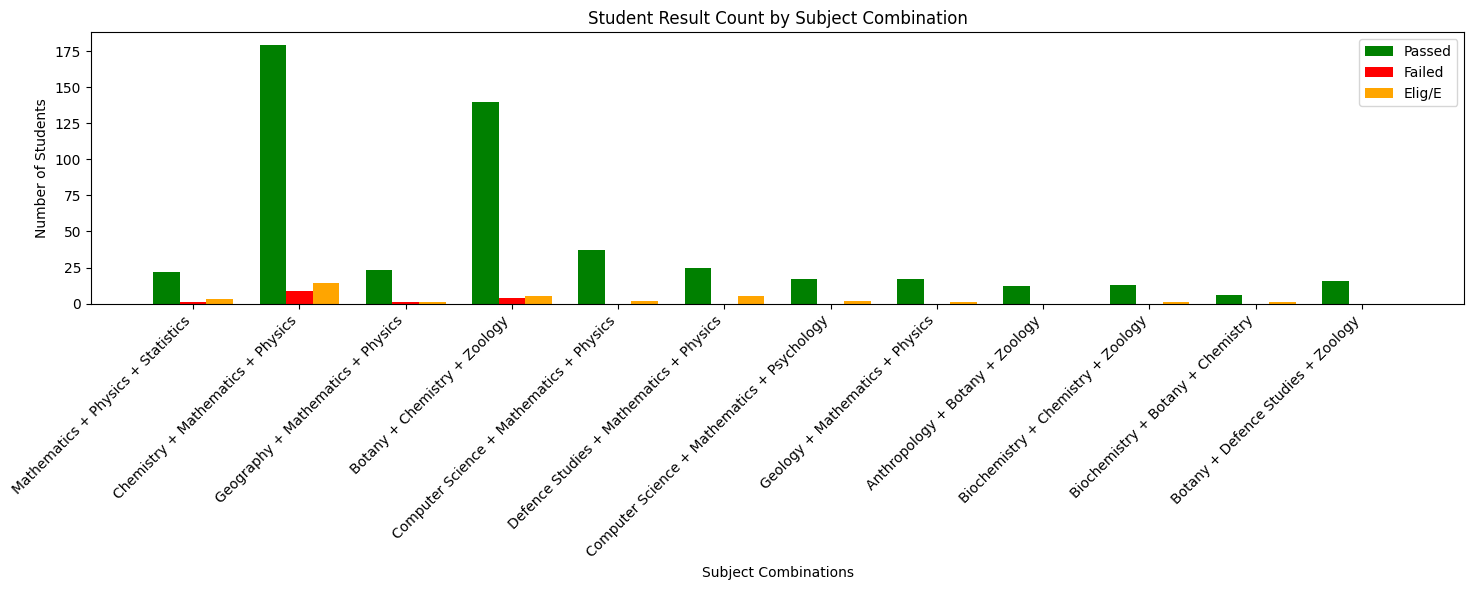

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up combinations
combinations = list(pass_stud_count.keys())
labels = [' + '.join(comb) for comb in combinations]

pass_vals = [pass_stud_count.get(key, 0) for key in combinations]
fail_vals = [fail_stud_count.get(key, 0) for key in combinations]
elig_vals = [elig_stud_count.get(key, 0) for key in combinations]

x = np.arange(len(combinations))  # label locations
width = 0.25

plt.figure(figsize=(15, 6))
plt.bar(x - width, pass_vals, width, label='Passed', color='green')
plt.bar(x, fail_vals, width, label='Failed', color='red')
plt.bar(x + width, elig_vals, width, label='Elig/E', color='orange')

plt.xlabel('Subject Combinations')
plt.ylabel('Number of Students')
plt.title('Student Result Count by Subject Combination')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

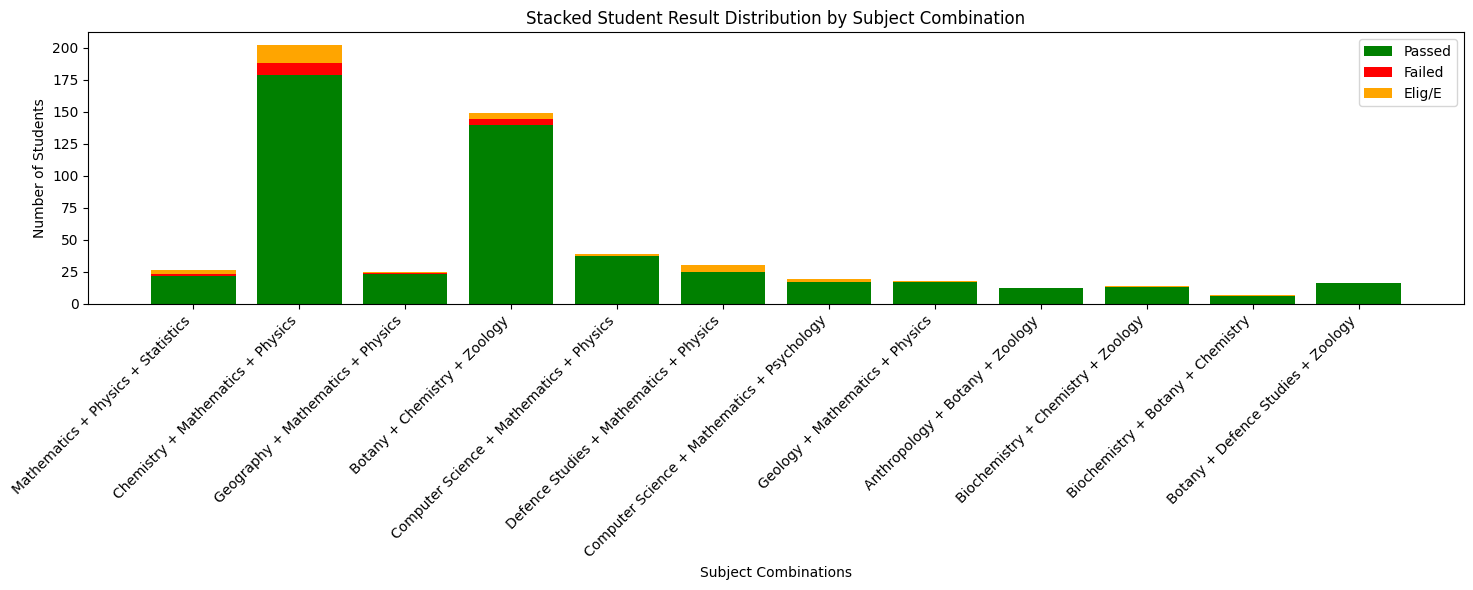

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(labels, pass_vals, label='Passed', color='green')
plt.bar(labels, fail_vals, bottom=pass_vals, label='Failed', color='red')
bottom_vals = [p + f for p, f in zip(pass_vals, fail_vals)]
plt.bar(labels, elig_vals, bottom=bottom_vals, label='Elig/E', color='orange')

plt.xlabel('Subject Combinations')
plt.ylabel('Number of Students')
plt.title('Stacked Student Result Distribution by Subject Combination')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

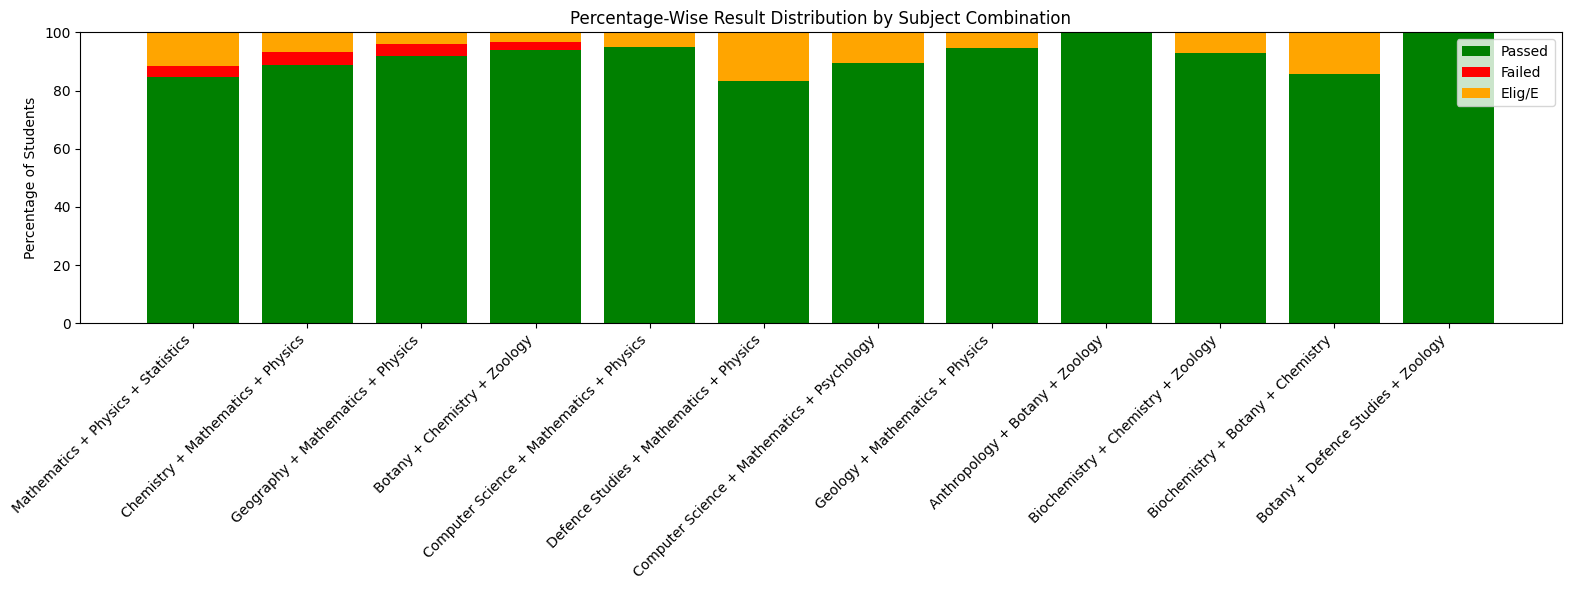

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Subject combinations
combinations = list(pass_stud_count.keys())
labels = [' + '.join(comb) for comb in combinations]

# Get raw counts
pass_vals = np.array([pass_stud_count.get(key, 0) for key in combinations])
fail_vals = np.array([fail_stud_count.get(key, 0) for key in combinations])
elig_vals = np.array([elig_stud_count.get(key, 0) for key in combinations])

# Total students in each combination
total_vals = pass_vals + fail_vals + elig_vals

# Avoid division by zero
total_vals[total_vals == 0] = 1

# Calculate percentages
pass_pct = (pass_vals / total_vals) * 100
fail_pct = (fail_vals / total_vals) * 100
elig_pct = (elig_vals / total_vals) * 100

# Plot
x = np.arange(len(combinations))
plt.figure(figsize=(16, 6))
plt.bar(x, pass_pct, label='Passed', color='green')
plt.bar(x, fail_pct, bottom=pass_pct, label='Failed', color='red')
plt.bar(x, elig_pct, bottom=pass_pct + fail_pct, label='Elig/E', color='orange')

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Percentage of Students')
plt.title('Percentage-Wise Result Distribution by Subject Combination')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()